<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"

#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [4]:
conn = sqlite3.connect('survey-data.sqlite')


## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [8]:
## Write your code here
QUERY = """
SELECT CompTotal from main"""
df_comp = pd.read_sql_query(QUERY, conn)
print(df_comp)

       CompTotal
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
65432        NaN
65433        NaN
65434        NaN
65435        NaN
65436        NaN

[65437 rows x 1 columns]


In [9]:
df_comp.dropna()

,CompTotal
72,2040000.0
374,28000.0
379,85000.0
385,50000.0
389,110000.0
...,...
65396,36000.0
65401,40000.0
65408,61000.0
65412,58000.0


Text(0.5, 1.0, 'Histogram distribution of Total Compensation')

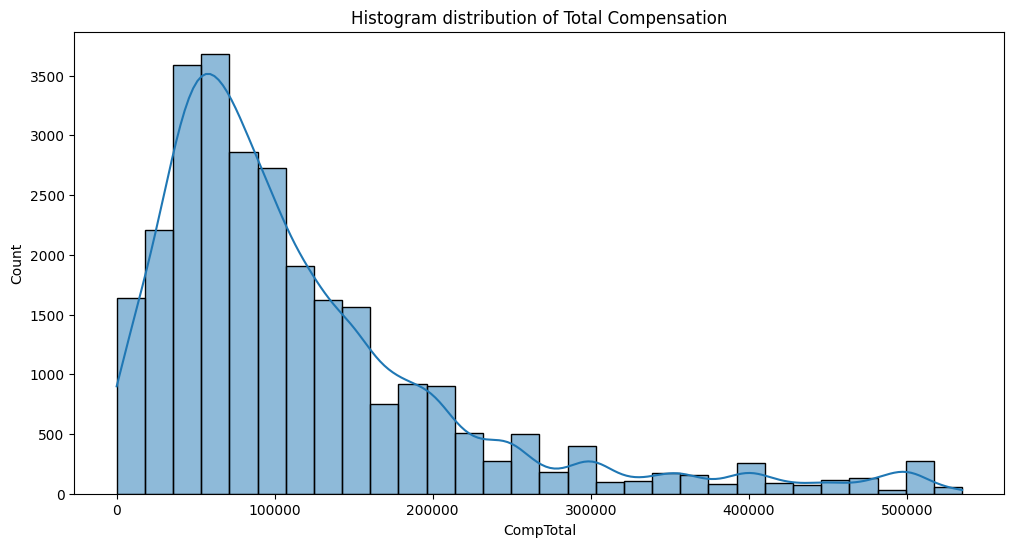

In [10]:
Q1 = df_comp['CompTotal'].quantile(0.25)
Q3 = df_comp['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_comp_no_outlier = df_comp[(df_comp['CompTotal']>= lower_bound) & (df_comp['CompTotal']<= upper_bound)]
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.histplot(df_comp_no_outlier['CompTotal'], bins=30, kde=True)
plt.title('Histogram distribution of Total Compensation')

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [11]:
## Write your code here
QUERY = """SELECT YearsCodePro from main"""
df_exp = pd.read_sql_query(QUERY, conn)
df_exp

,YearsCodePro
0,None
1,17
2,27
3,None
4,None
...,...
65432,3
65433,None
65434,5
65435,2


In [12]:
df_exp = df_exp.dropna(subset='YearsCodePro')
df_exp

,YearsCodePro
1,17
2,27
6,7
9,11
11,25
...,...
65428,7
65431,24
65432,3
65434,5


In [13]:
df_exp = df_exp.replace({'Less than 1 year':0,
           'More than 50 years': 51})
print(df_exp['YearsCodePro'].unique())

['17' '27' '7' '11' '25' '12' '10' '3' 0 '18' '37' '15' '20' '6' '2' '16'
 '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35' '23'
 '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41' '36'
 '38' 51 '43' '47' '48' '46' '49']


In [14]:
df_exp['YearsCodePro'].dtypes

dtype('O')

In [15]:
df_exp.astype('float')

,YearsCodePro
1,17.0
2,27.0
6,7.0
9,11.0
11,25.0
...,...
65428,7.0
65431,24.0
65432,3.0
65434,5.0


In [16]:
df_exp['YearsCodePro'].dtypes

dtype('O')

Text(0.5, 1.0, 'Histogram distribution of Coding experience')

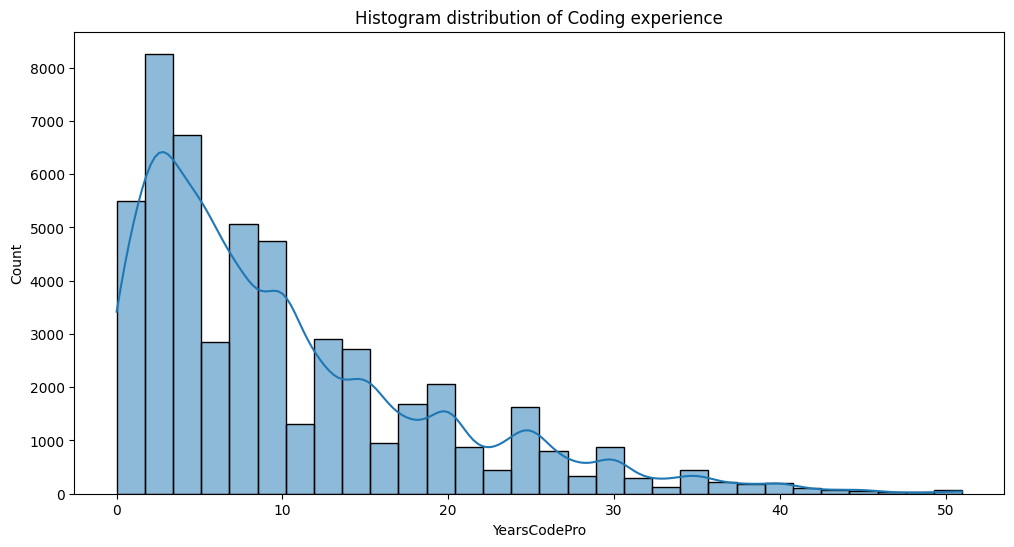

In [18]:
# Use pd.to_numeric() with errors='coerce' to convert the column. This will convert non-numeric values to NaN
df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')
df_exp['YearsCodePro'].dtypes

plt.figure(figsize = (12, 6))
sns.histplot(df_exp['YearsCodePro'], bins=30, kde=True)
plt.title('Histogram distribution of Coding experience')

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [20]:
## Write your code here
QUERY = """SELECT CompTotal, Age from main"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,CompTotal,Age
0,NaN,Under 18 years old
1,NaN,35-44 years old
2,NaN,45-54 years old
3,NaN,18-24 years old
4,NaN,18-24 years old


In [21]:
df['CompTotal'].isnull().sum()


np.int64(31697)

In [22]:
df['Age'].isnull().sum()


np.int64(0)

In [23]:
df_comp = df.dropna(subset='CompTotal')
df_comp.value_counts()

CompTotal  Age            
60000.0    25-34 years old    374
100000.0   25-34 years old    365
50000.0    25-34 years old    321
120000.0   25-34 years old    303
100000.0   35-44 years old    302
                             ... 
9.0        35-44 years old      1
10.0       25-34 years old      1
           45-54 years old      1
11.0       18-24 years old      1
12.0       18-24 years old      1
Name: count, Length: 5590, dtype: int64

In [24]:
Q1 = df_comp['CompTotal'].quantile(0.25)
Q3 = df_comp['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_comp_no_outlier = df_comp[(df_comp['CompTotal']>= lower_bound) & (df_comp['CompTotal']<= upper_bound)]
df_comp_no_outlier.value_counts()

CompTotal  Age              
60000.0    25-34 years old      374
100000.0   25-34 years old      365
50000.0    25-34 years old      321
120000.0   25-34 years old      303
100000.0   35-44 years old      302
                               ... 
106887.0   25-34 years old        1
107000.0   18-24 years old        1
           65 years or older      1
107100.0   25-34 years old        1
108356.0   25-34 years old        1
Name: count, Length: 3794, dtype: int64

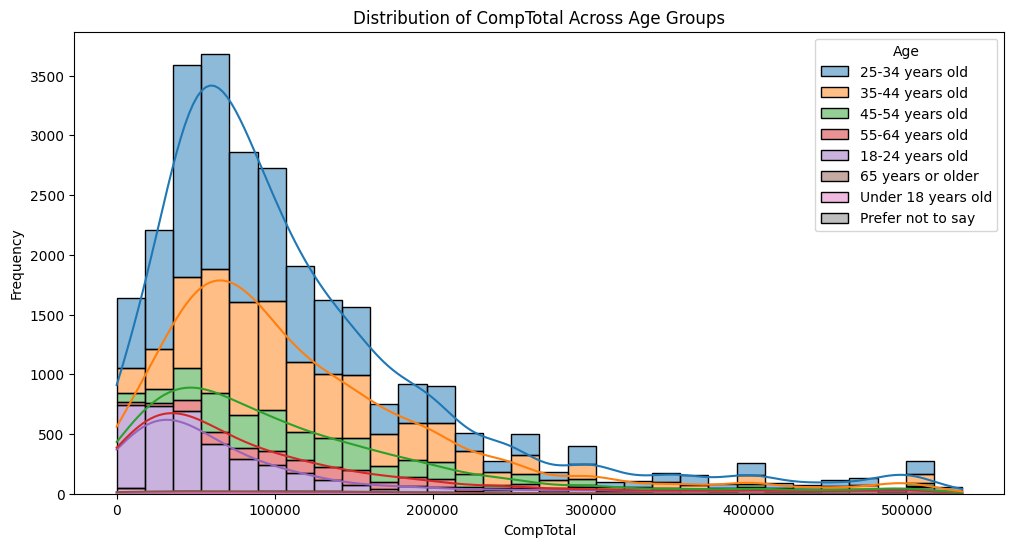

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_comp_no_outlier, x='CompTotal', hue='Age', multiple='stack', bins=30, kde=True)
plt.title('Distribution of CompTotal Across Age Groups')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [26]:
## Write your code here
QUERY = """SELECT TimeSearching, Age from main"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,TimeSearching,Age
0,None,Under 18 years old
1,None,35-44 years old
2,None,45-54 years old
3,None,18-24 years old
4,None,18-24 years old


In [27]:
df['TimeSearching'].isnull().sum()

np.int64(36526)

In [28]:
df_time_search = df.dropna(subset='TimeSearching')
df_time_search['TimeSearching'].isnull().sum()

np.int64(0)

In [29]:
df_time_search['TimeSearching'].value_counts()


TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

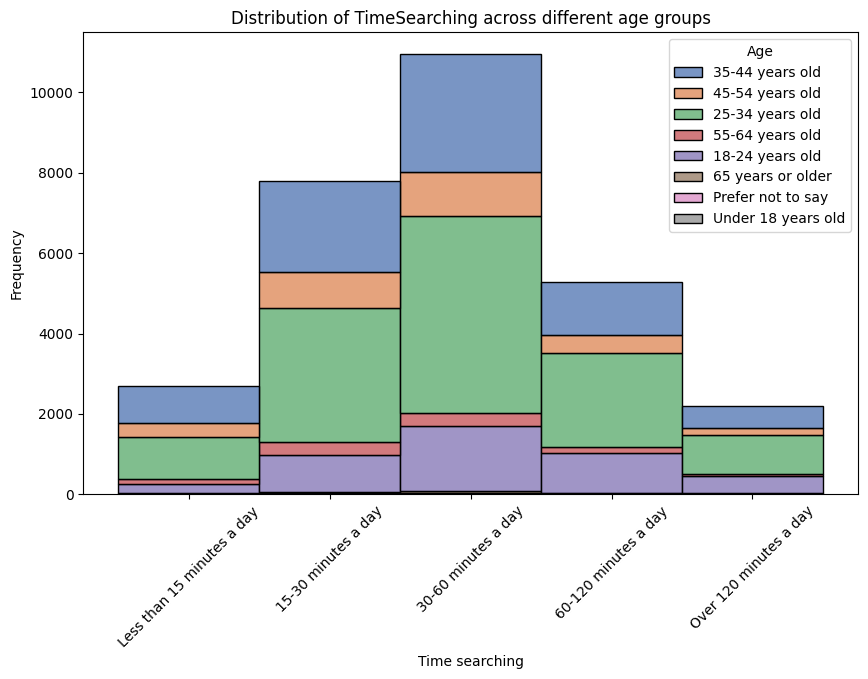

In [30]:
# Step 1: Define the order of categories
time_order = ['Less than 15 minutes a day', '15-30 minutes a day', '30-60 minutes a day', '60-120 minutes a day','Over 120 minutes a day']
df_time_search = df_time_search.copy()
# Step 2: Convert to categorical type with the specified order
df_time_search['TimeSearching'] = pd.Categorical(df_time_search['TimeSearching'], categories=time_order, ordered=True)
plt.figure(figsize = (10,6))
sns.histplot(df_time_search, x = 'TimeSearching', hue = 'Age',multiple='stack', palette = 'deep')
plt.title('Distribution of TimeSearching across different age groups')
plt.xlabel('Time searching')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [31]:
## Write your code here
QUERY = """SELECT DatabaseWantToWorkWith from main"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,DatabaseWantToWorkWith
0,None
1,PostgreSQL
2,Firebase Realtime Database
3,MongoDB;MySQL;PostgreSQL
4,PostgreSQL;SQLite


In [32]:
df.isnull().sum()

DatabaseWantToWorkWith    22879
dtype: int64

In [33]:
df_db_want = df.dropna(subset = 'DatabaseWantToWorkWith')
df_db_want.isnull().sum()

DatabaseWantToWorkWith    0
dtype: int64

In [34]:
df_db_want['Db_want_count'] = df_db_want['DatabaseWantToWorkWith'].str.split(';').str.len()
df_db_want['Db_want_count']

/tmp/ipykernel_846/1914338800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db_want['Db_want_count'] = df_db_want['DatabaseWantToWorkWith'].str.split(';').str.len()


1         1
2         1
3         3
4         2
5         1
         ..
65421     1
65427    14
65431     3
65435     2
65436     3
Name: Db_want_count, Length: 42558, dtype: int64

In [35]:
df_db_want = df_db_want.copy()
df_db_want = df_db_want[df_db_want['Db_want_count']<=5]
df_db_want['DatabaseWantToWorkWith']

1                            PostgreSQL
2            Firebase Realtime Database
3              MongoDB;MySQL;PostgreSQL
4                     PostgreSQL;SQLite
5                       Cloud Firestore
                      ...              
65414                         Cassandra
65421                          Dynamodb
65431    Elasticsearch;PostgreSQL;Redis
65435                 PostgreSQL;SQLite
65436          MongoDB;MySQL;PostgreSQL
Name: DatabaseWantToWorkWith, Length: 38129, dtype: object

In [36]:
from collections import Counter
!pip install matplotlib-venn
from matplotlib_venn import venn2
db_want_count = Counter(df_db_want['DatabaseWantToWorkWith'].str.split(';').explode().str.strip())
db_want_count

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 188.5 MB/s eta 0:00:00
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=bca483ae625c4a51d6c74c6955584156487bed5320664d2941b64de245696dcf
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


Counter({'PostgreSQL': 20234,
         'SQLite': 10894,
         'MySQL': 9469,
         'MongoDB': 8086,
         'Redis': 7886,
         'Microsoft SQL Server': 6432,
         'MariaDB': 4202,
         'Elasticsearch': 3978,
         'Dynamodb': 2215,
         'Supabase': 1971,
         'Oracle': 1781,
         'BigQuery': 1565,
         'Firebase Realtime Database': 1455,
         'Cloud Firestore': 1270,
         'Cassandra': 1130,
         'Cosmos DB': 1107,
         'Snowflake': 1070,
         'DuckDB': 989,
         'Neo4J': 859,
         'Clickhouse': 839,
         'Databricks SQL': 706,
         'InfluxDB': 636,
         'H2': 599,
         'Cockroachdb': 584,
         'Microsoft Access': 385,
         'Solr': 286,
         'Datomic': 254,
         'Couch DB': 249,
         'Firebird': 233,
         'IBM DB2': 192,
         'EventStoreDB': 146,
         'Presto': 129,
         'Couchbase': 129,
         'TiDB': 103,
         'RavenDB': 78})

In [37]:
df_db_want_count = pd.DataFrame(db_want_count.items(), columns = ['DataBase', 'Db_counts'])
df_db_want_count.head()

,DataBase,Db_counts
0,PostgreSQL,20234
1,Firebase Realtime Database,1455
2,MongoDB,8086
3,MySQL,9469
4,SQLite,10894


In [38]:
top5_db = df_db_want_count.sort_values('Db_counts', ascending=False).head(5)
top5_db

,DataBase,Db_counts
0,PostgreSQL,20234
4,SQLite,10894
3,MySQL,9469
2,MongoDB,8086
7,Redis,7886


<Axes: xlabel='DataBase', ylabel='Db_counts'>

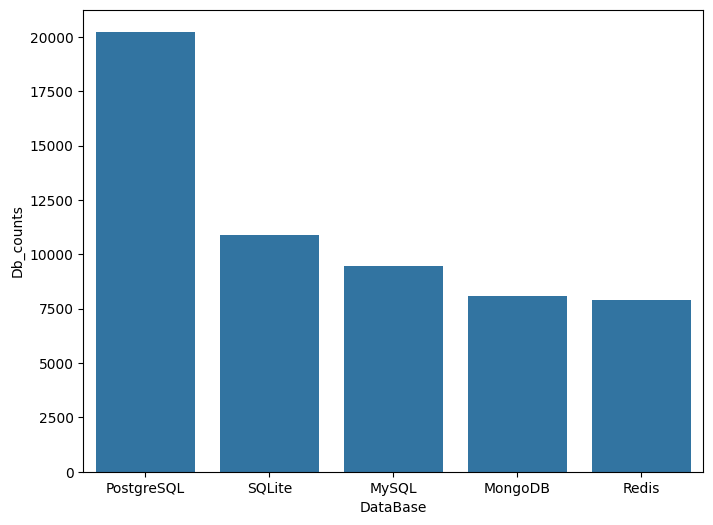

In [39]:
plt.figure(figsize = (8,6))
sns.barplot(top5_db, x='DataBase', y='Db_counts')

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [40]:
## Write your code here
QUERY = """SELECT RemoteWork from main"""
df = pd.read_sql_query(QUERY, conn)
df.isnull().sum()


RemoteWork    10631
dtype: int64

In [41]:
df_re = df.dropna(subset = 'RemoteWork')
df_re.isnull().sum()

RemoteWork    0
dtype: int64

In [42]:
df_re.value_counts()

RemoteWork                          
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

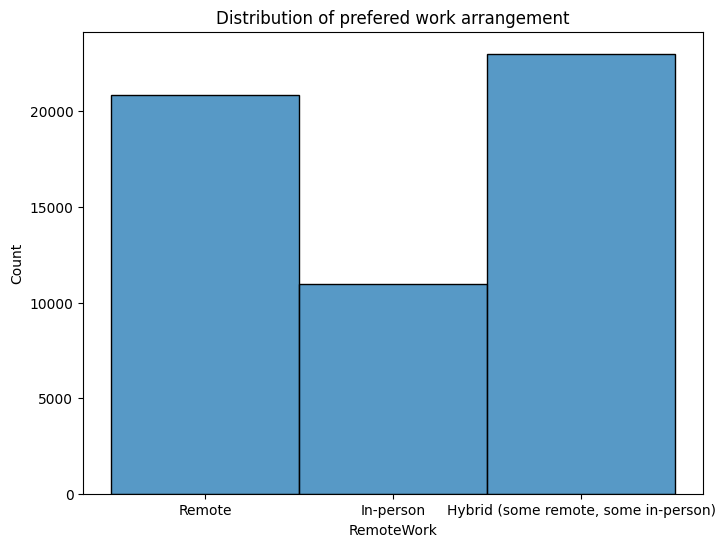

In [43]:
plt.figure(figsize = (8,6))
sns.histplot(df_re, x='RemoteWork')
plt.title('Distribution of prefered work arrangement')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


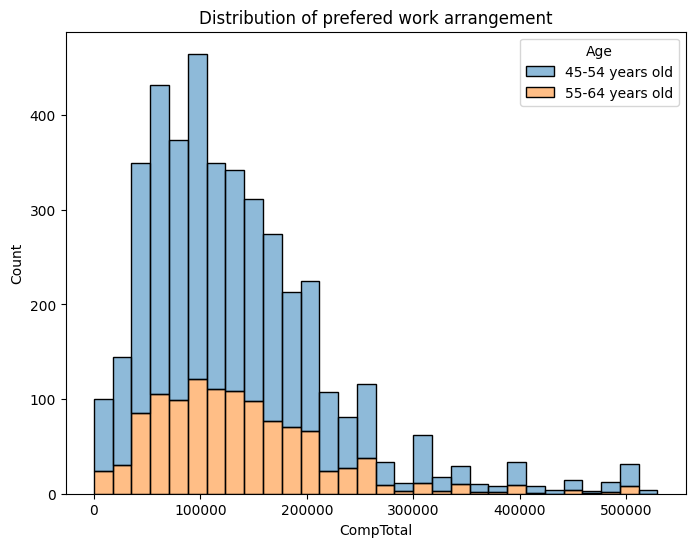

In [44]:
## Write your code here
# use df_comp_no_outlier above which contain no outlier for compensation
group_age = (['45-54 years old', '55-64 years old'])
df_comp_age_45_64 = df_comp_no_outlier[df_comp_no_outlier['Age'].isin(group_age)]
plt.figure(figsize = (8,6))
sns.histplot(df_comp_age_45_64, x='CompTotal', hue='Age', bins = 30, alpha = 0.5, multiple = 'stack')
plt.title('Distribution of prefered work arrangement')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [45]:
## Write your code here
QUERY = """SELECT YearsCodePro, JobSat from main"""
df = pd.read_sql_query(QUERY, conn)
df['YearsCodePro'].isnull().sum()

np.int64(13827)

In [46]:
df_sat_year = df.dropna(subset = ['YearsCodePro', 'JobSat'])
df_sat_year['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51})  

12       12
15       27
18       10
20        0
22       18
         ..
65178    17
65241    10
65265     2
65351     7
65412    18
Name: YearsCodePro, Length: 28356, dtype: object

In [47]:
df_sat_year['JobSat'].value_counts()

JobSat
8.0     7325
7.0     6243
6.0     3651
9.0     3557
10.0    2196
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64

In [48]:
df_sat_year = df_sat_year.copy()
df_sat_year['JobSat_recode'] = df_sat_year['JobSat'].replace({0: 'Very unsatisfied',
                               1: 'Very unsatisfied',
                               2: 'Very unsatisfied',
                               3: 'Unsatisfied',
                               4: 'Unsatisfied',
                               5: 'Neutral',
                               6: 'Neutral',
                               7: 'Satisfied',
                               8: 'Satisfied',
                               9: 'Very satisfied',
                               10: 'Very satisfied'})
df_sat_year

,YearsCodePro,JobSat,JobSat_recode
12,12,8.0,Satisfied
15,27,5.0,Neutral
18,10,10.0,Very satisfied
20,Less than 1 year,6.0,Neutral
22,18,9.0,Very satisfied
...,...,...,...
65178,17,8.0,Satisfied
65241,10,5.0,Neutral
65265,2,8.0,Satisfied
65351,7,8.0,Satisfied


<Axes: xlabel='YearsCodePro', ylabel='Count'>

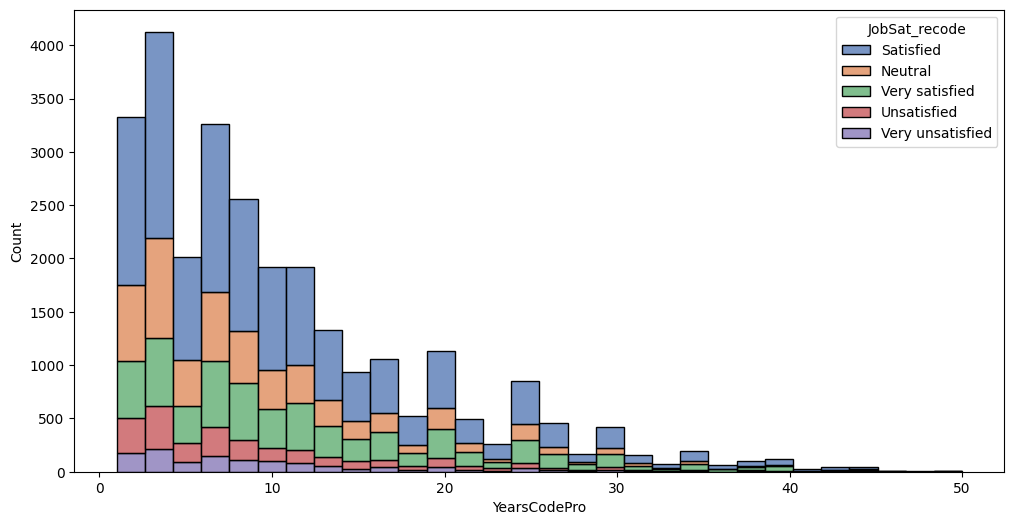

In [49]:
df_sat_year['YearsCodePro'] = pd.to_numeric(df_sat_year['YearsCodePro'], errors='coerce')
plt.figure(figsize = (12, 6))
sns.histplot(df_sat_year, x='YearsCodePro', hue='JobSat_recode', bins = 30, multiple='stack', palette = 'deep')

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [54]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
